In [1]:
import os
import mne

import scipy as sc
import numpy as np

from scipy.io.wavfile import read as read_wav

import matplotlib.pyplot as plt
from IPython.display import Audio, display

In [2]:
SUB_ID = '01'
GEN_ID = '01'

ROOT_PATH = 'preprocessing/data'

In [3]:
data = mne.io.read_raw_fif(os.path.join(ROOT_PATH, f'ica_sub-{SUB_ID}_task-genMusic{GEN_ID}_eeg.fif'))
data

Opening raw data file preprocessing/data\ica_sub-01_task-genMusic01_eeg.fif...
    Range : 0 ... 379903 =      0.000 ...   741.998 secs
Ready.


<Raw | ica_sub-01_task-genMusic01_eeg.fif, 47 x 379904 (742.0 s), ~56 kB, data not loaded>

# Load Musics

## From OpenNeuro

In [4]:
MUSIC_ROOT_PATH = 'data/openneuro/stimuli/generated'

In [5]:
musics = dict()
music_list = list(data.annotations.description.copy())
for fid in music_list:
    musics[fid] = dict(zip(['rate', 'data'], read_wav(os.path.join(MUSIC_ROOT_PATH, fid))))
    if len(musics[fid]['data'].shape) == 2:
        musics[fid]['data'] = musics[fid]['data'][:, 0]
    musics[fid]['cue_samples'] = 0
    musics[fid]['data'] = musics[fid]['data'].astype(float)
    print(fid, musics[fid]['rate'], musics[fid]['data'].shape)

2-8_1.wav 44100 (1777660,)
4-5_2.wav 44100 (1764000,)
2-8_2.wav 44100 (1764000,)
8-2_1.wav 44100 (1764000,)
2-8_2.wav 44100 (1764000,)
2-8_2.wav 44100 (1764000,)
8-2_2.wav 44100 (1764000,)
2-8_3.wav 44100 (1764000,)
2-8_1.wav 44100 (1777660,)
8-2_3.wav 44100 (1764000,)
4-5_2.wav 44100 (1764000,)


C:\Users\Paul\AppData\Local\Temp\ipykernel_80408\1184048976.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  musics[fid] = dict(zip(['rate', 'data'], read_wav(os.path.join(MUSIC_ROOT_PATH, fid))))


## From OpenMIIR

This directory contains the audio stimuli and cues.

-   cues.v1 - version 1 of the cue clicks (P01-P08)

-   cues.v2 - version 2 of the cue clicks (P09-P14)

-   full.v1 - version 1 of the full stimuli including cue clicks (P01-P08)

-   full.v2 - version 2 of the full stimuli including cue clicks (P09-P14)

In [6]:
MIIR_ROOT = 'data/openmiir/audio/'
for _, dirs, _ in os.walk(MIIR_ROOT):
    for d in dirs:
        for _, _, files in os.walk(os.path.join(MIIR_ROOT, d)):
            for fn in files:
                if fn.endswith('wav'):
                    fid = os.path.join(d, fn)
                    music_list.append(fid)
                    musics[fid] = dict(zip(['rate', 'data'], read_wav(os.path.join(MIIR_ROOT, fid))))
                    if len(musics[fid]['data'].shape) == 2:
                        musics[fid]['data'] = musics[fid]['data'][:, 0]
                    if 'full' in fid: # Trim cue
                        musics[fid]['cue_samples'] = musics[fid.replace('full', 'cues').replace('.wav', '_cue.wav')]['data'].shape[0]
                        musics[fid]['data'][:musics[fid]['cue_samples']] = 0
                    musics[fid]['data'] = musics[fid]['data'].astype(float)
                    print(fid, musics[fid]['rate'], musics[fid]['data'].shape)

cues.v1\S01_Chim Chim Cheree_lyrics_cue.wav 44100 (84269,)
cues.v1\S02_Take Me Out To The Ballgame_lyrics_cue.wav 44100 (94480,)
cues.v1\S03_Jingle Bells_lyrics_cue.wav 44100 (114291,)
cues.v1\S04_Mary Had A Little Lamb_lyrics_cue.wav 44100 (142656,)
cues.v1\S11_Chim Chim Cheree_no lyrics_cue.wav 44100 (91681,)
cues.v1\S12_Take Me Out To The Ballgame_no lyrics_cue.wav 44100 (91778,)
cues.v1\S13_Jingle Bells_no lyrics_cue.wav 44100 (116873,)
cues.v1\S14_Mary Had A Little Lamb_no lyrics_cue.wav 44100 (141930,)
cues.v1\S21_EmperorWaltz_cue.wav 44100 (95049,)
cues.v1\S22_Harry Potter Theme_cue.wav 44100 (95167,)
cues.v1\S23_Star Wars Theme_cue.wav 44100 (116875,)
cues.v1\S24_Eine kleine Nachtmusic_cue.wav 44100 (160983,)
cues.v2\S01_Chim Chim Cheree_lyrics_cue.wav 44100 (83406,)
cues.v2\S02_Take Me Out To The Ballgame_lyrics_cue.wav 44100 (91208,)
cues.v2\S03_Jingle Bells_lyrics_cue.wav 44100 (114291,)
cues.v2\S04_Mary Had A Little Lamb_lyrics_cue.wav 44100 (142656,)
cues.v2\S11_Chim Chim 

In [ ]:
# mid = 'full.v1\S11_Chim Chim Cheree_no lyrics.wav'
# mid = 'full.v1\S12_Take Me Out To The Ballgame_no lyrics.wav'
# mid = 'full.v1\S22_Harry Potter Theme.wav'
# mid = 'full.v2\S11_Chim Chim Cheree_no lyrics.wav'
# mid = 'full.v2\S12_Take Me Out To The Ballgame_no lyrics.wav'
# mid = 'full.v2\S13_Jingle Bells_no lyrics.wav'
# mid = 'full.v2\S14_Mary Had A Little Lamb_no lyrics.wav'
# mid = 'full.v2\S21_EmperorWaltz.wav'
# mid = 'full.v2\S22_Harry Potter Theme.wav'
# mid = 'full.v2\S23_Star Wars Theme.wav'
# mid = 'full.v2\S24_Eine kleine Nachtmusic.wav'
mid = music_list[0]
Audio(
    data=musics[mid]['data'],
    rate=musics[mid]['rate']
)

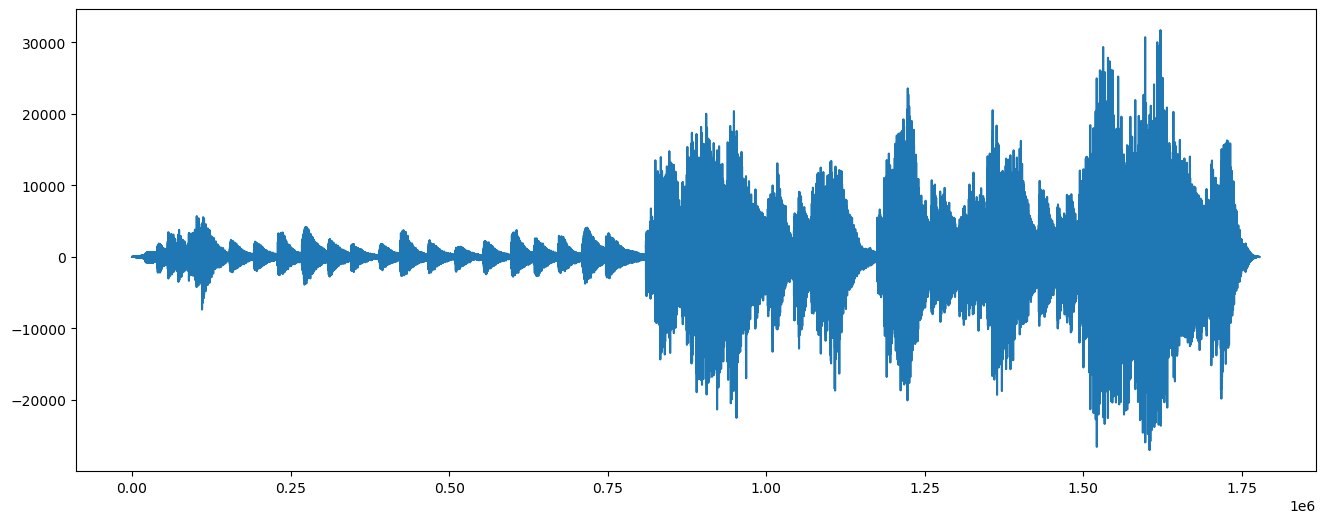

In [8]:
fig = plt.figure(figsize=(16, 6))
plt.plot(musics[mid]['data'])

# Create FFT

In [ ]:
music = musics[mid]
example = music['data']

example_sample = example[music['cue_samples']: music['cue_samples'] + music['rate']] # first second

Audio(
    data=example_sample,
    rate=music['rate'],
)

(0.0, 2000.0)

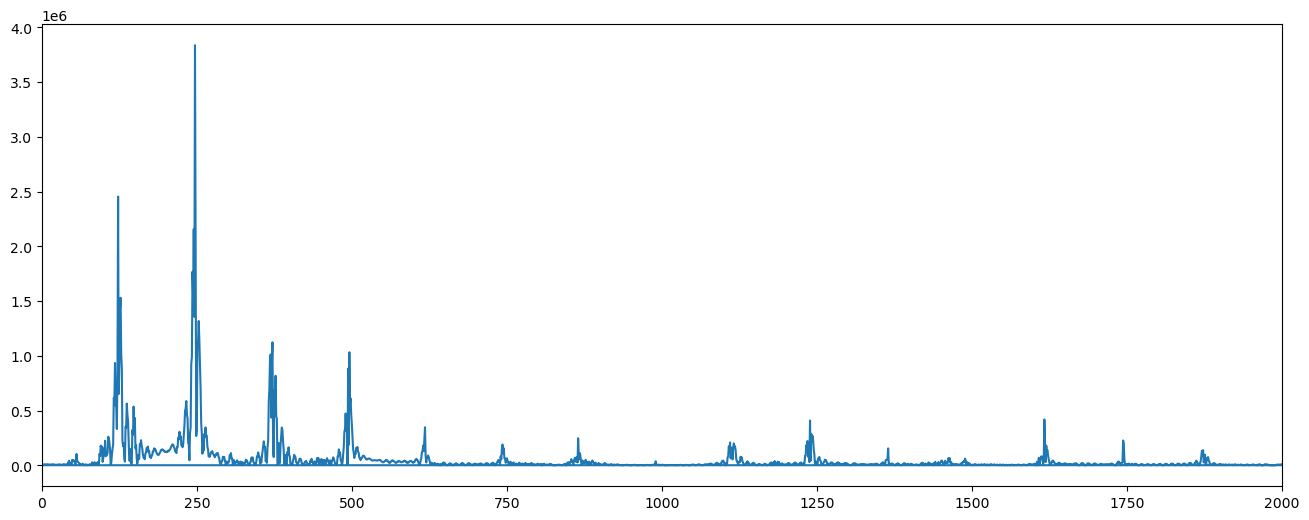

In [10]:
example_fft = sc.fft.fft(example_sample)
example_freq = sc.fft.fftfreq(len(example_sample), d=1/music['rate'])

# Plot
fig = plt.figure(figsize=(16, 6))
ax = fig.subplots(1, 1)
ax.plot(example_freq, np.abs(example_fft.real))
ax.set_xlim(0, 2000)

# Find Notes

In [11]:
import librosa
import librosa.display

In [12]:
def find_notes(fft, fft_freq, ntop=3, min_freq=librosa.note_to_hz('A0'), max_freq=librosa.note_to_hz('C8'), with_plot=False):
    '''
        @returns: Positions (x, y), Name ['C', ...]
        @rtype: tuple(tuple, list)
    '''
    found_pos = []
    found_name = []
    found_note = set()
    
    # List of (idx, magnitude), sort by max-min magnitude
    lst = list(zip(range(fft.shape[0]), abs(fft.real)))
    lst = sorted(lst, key=lambda x: x[1],reverse=True)
    
    less_freq = max_freq
    most_freq = min_freq
    
    for idx, mag in lst:
        f = fft_freq[idx]
        if f < min_freq or max_freq < f:
            continue
        name = librosa.hz_to_note(f).replace('♯', '#')
        
        if name not in found_note:
            found_note.add(name)
            found_pos.append([f, mag])
            found_name.append(name)
            
            less_freq = min(less_freq, f)
            most_freq = max(most_freq, f)

        if len(found_note) == ntop:
            break
    
    found_pos = np.asarray(found_pos)
    
    if with_plot:
        fig = plt.figure(figsize=(16, 3))
        ax = fig.subplots(1, 1)
        ax.plot(fft_freq, np.abs(fft.real))
        padding = (most_freq - less_freq) * .05
        ax.set_xlim(less_freq - padding, most_freq + padding)
        ax.scatter(found_pos[:, 0], found_pos[:, 1], c='tab:orange')
        for x, y, n in zip(found_pos[:, 0], found_pos[:, 1], found_name):
            ax.text(x + 10, y, n)
        plt.show()
    return found_pos, found_name

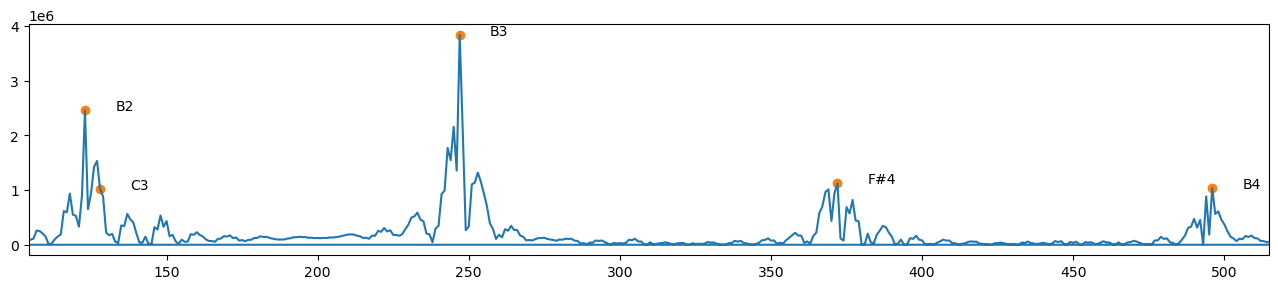

In [13]:
found_pos, found_name = find_notes(example_fft, example_freq, ntop=5, with_plot=True)

## Play chord

In [14]:
from music21.note import Note
from music21.chord import Chord

In [15]:
print(found_name)
Chord(found_name).show('midi')
Audio(
    data=example_sample,
    rate=music['rate'],
)

['B3', 'B2', 'F#4', 'B4', 'C3']


In [16]:
# print('Lowest Note')
# Note('A0').show('midi')
# print('Highest Note')
# Note('C8').show('midi')

# Create Note Epochs

In [17]:
y, sr = music['data'], music['rate']

In [18]:
hop_length = 512

In [19]:
n_fft = 2**11

## Decompose

In [20]:
D = librosa.stft(y, n_fft=n_fft)
H, P= librosa.decompose.hpss(D, margin=3.0)
R = D - (H+P)

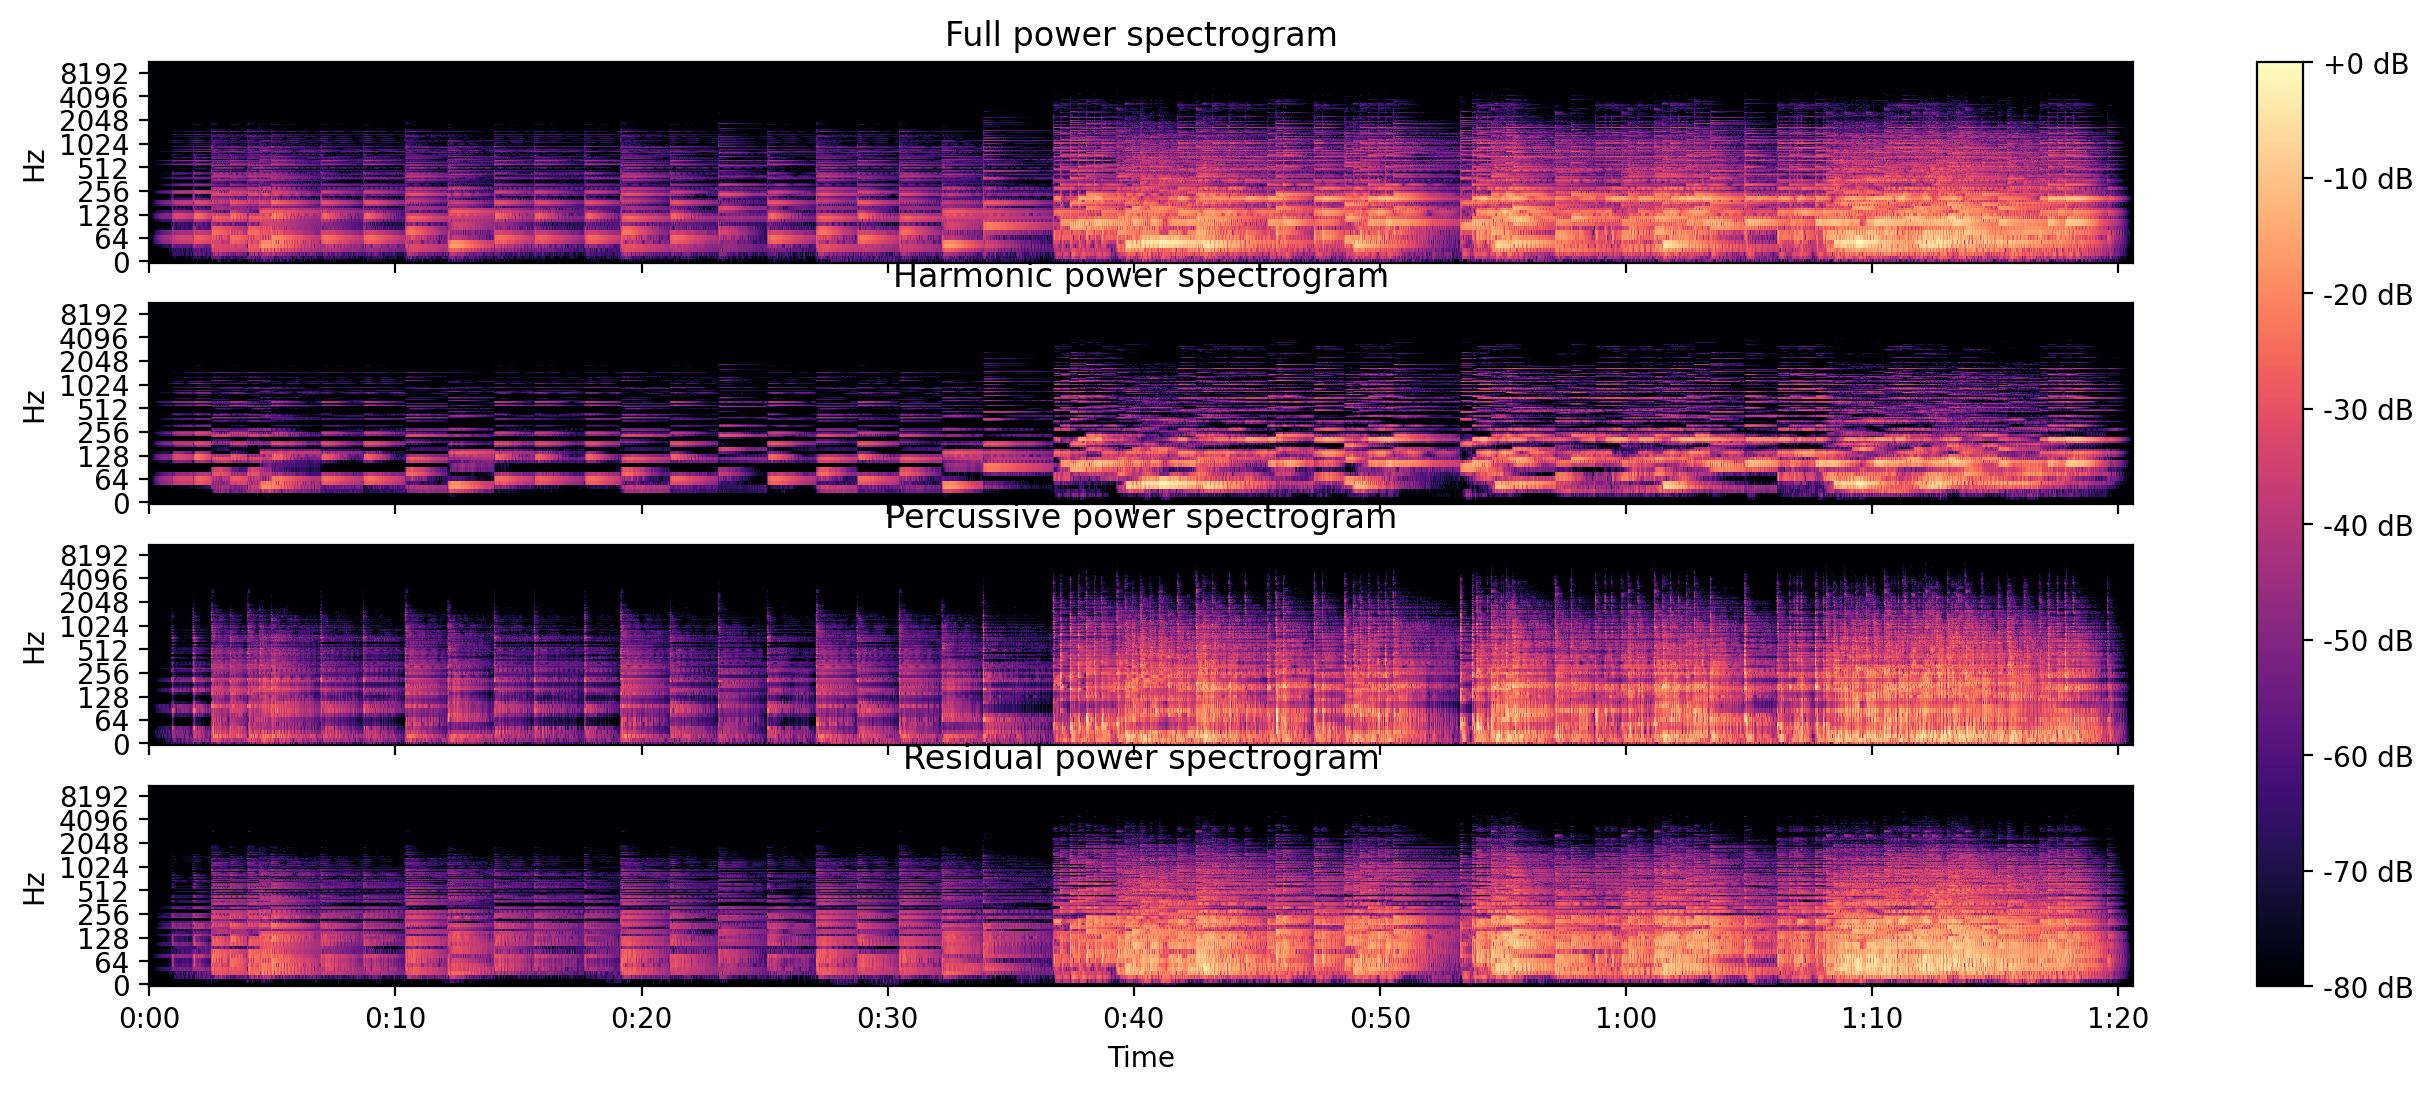

In [21]:
fig = plt.figure(figsize=(16, 6))
ax = fig.subplots(nrows=4, sharex=True, sharey=True)
img = librosa.display.specshow(librosa.amplitude_to_db(np.abs(D),
                                                       ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Full power spectrogram')
ax[0].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(np.abs(H),
                                                 ref=np.max(np.abs(D))),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Harmonic power spectrogram')
ax[1].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(np.abs(P),
                                                 ref=np.max(np.abs(D))),
                         y_axis='log', x_axis='time', ax=ax[2])
ax[2].set(title='Percussive power spectrogram')
ax[2].label_outer()

librosa.display.specshow(librosa.amplitude_to_db(np.abs(R),
                                                 ref=np.max(np.abs(D))),
                         y_axis='log', x_axis='time', ax=ax[3])
ax[3].set(title='Residual power spectrogram')
fig.colorbar(img, ax=ax, format='%+2.0f dB')

In [ ]:
np.float = np.float64  # Fixing compatible
y_harm = librosa.istft(H, n_fft=n_fft)
y_perc = librosa.istft(P, n_fft=n_fft)
y_resi = librosa.istft(R, n_fft=n_fft)
print('Harmonic Components:')
display(Audio(data=y_harm, rate=sr))
print('Percussion Components:')
display(Audio(data=y_perc, rate=sr))
print('Residual Components:')
display(Audio(data=y_resi, rate=sr))

## Perceptual Weighting

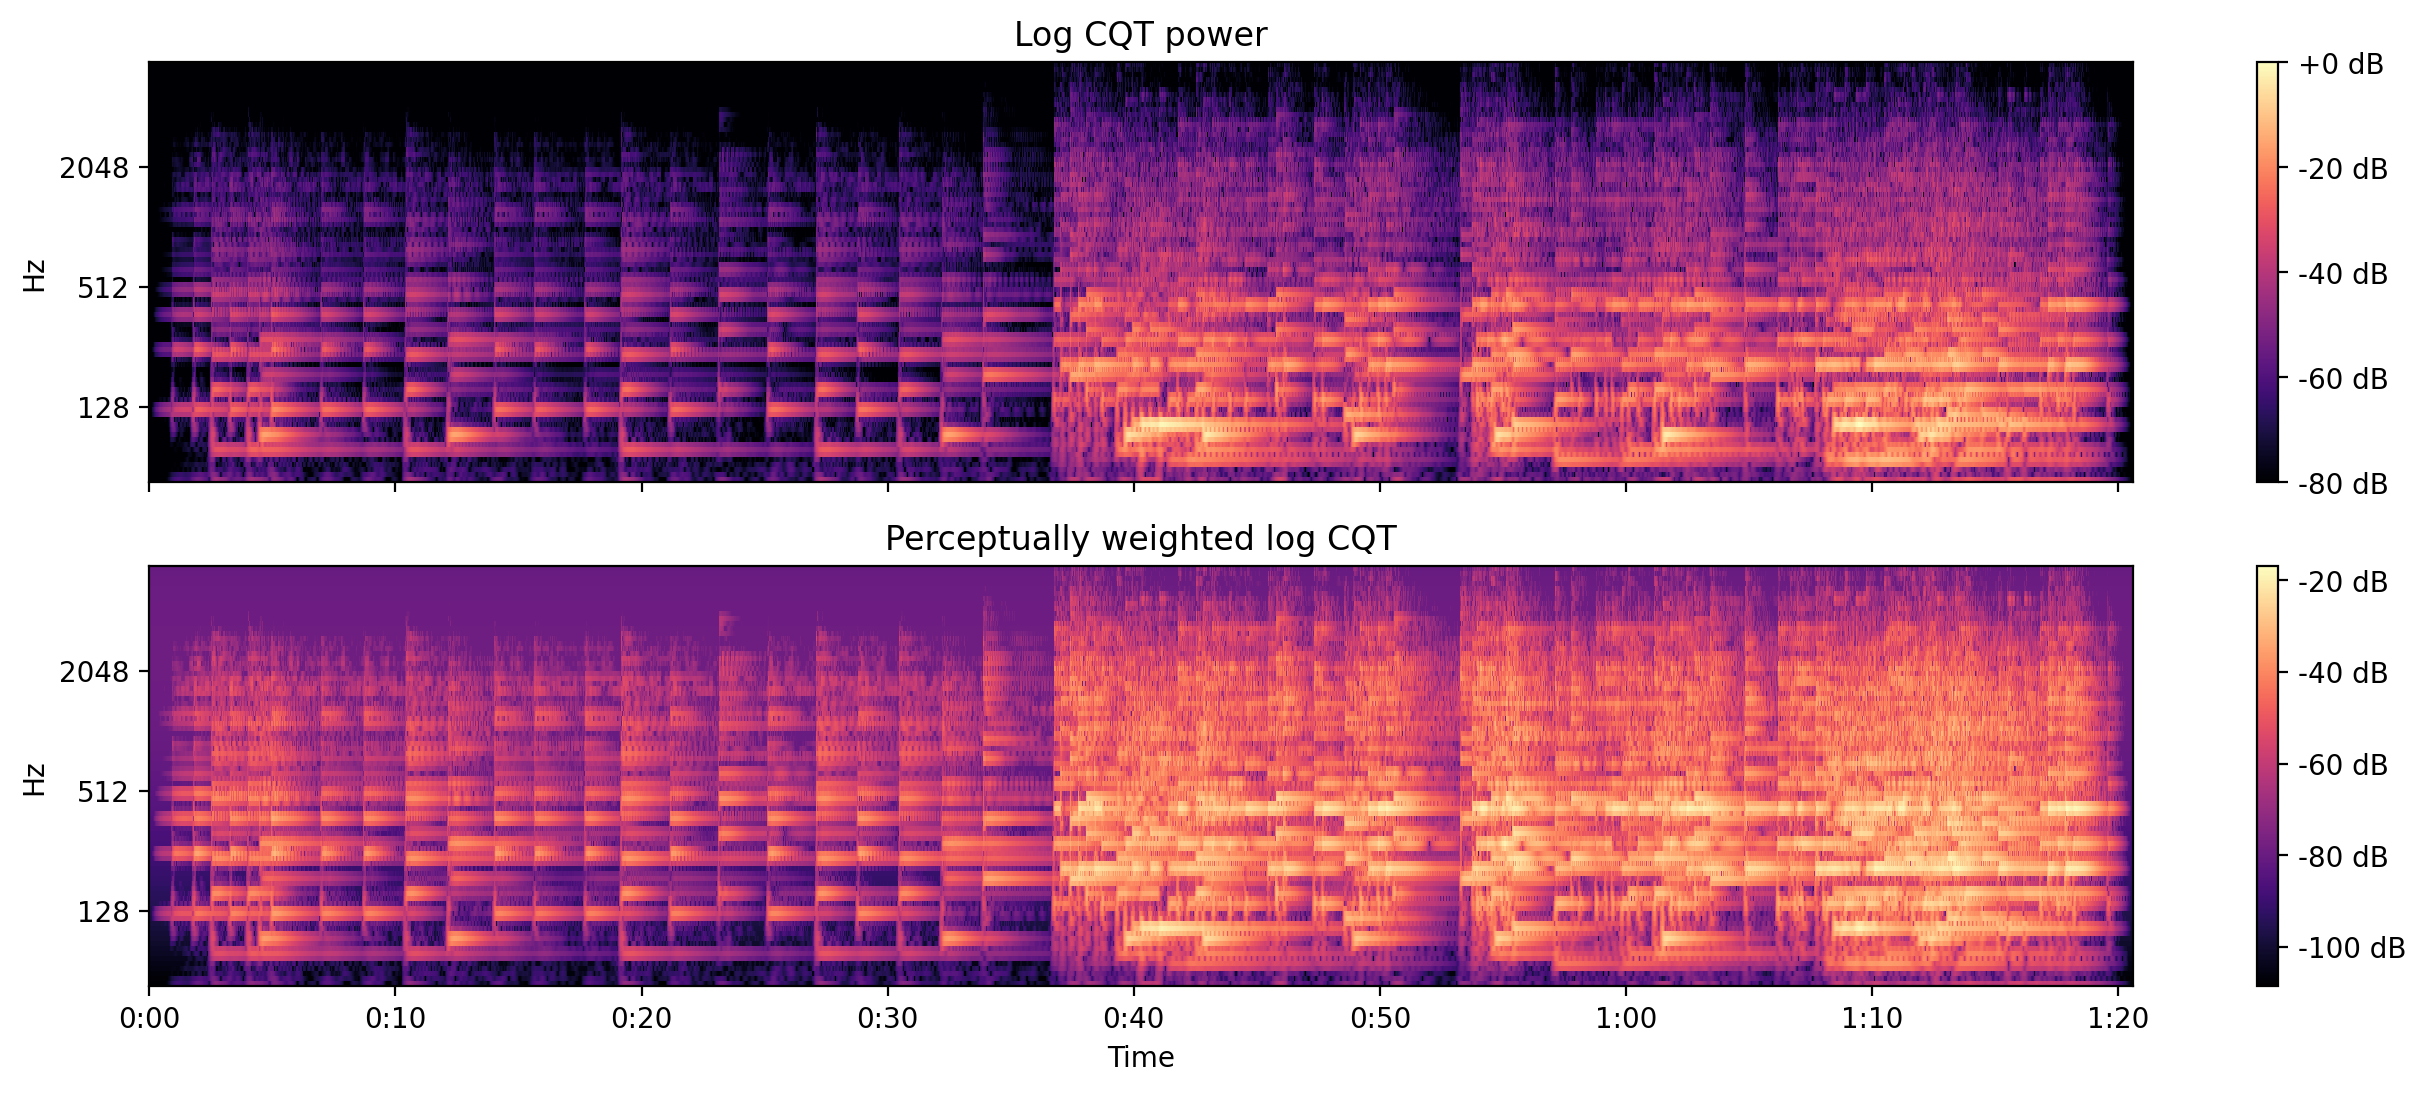

In [23]:
C = np.abs(librosa.cqt(y, sr=sr, fmin=librosa.note_to_hz('A1'), hop_length=hop_length))
freqs = librosa.cqt_frequencies(C.shape[0], fmin=librosa.note_to_hz('A1'))
perceptual_CQT = librosa.perceptual_weighting(C**2, freqs, ref=np.max)

# Plot
fig = plt.figure(figsize=(16, 6))
ax = fig.subplots(nrows=2, sharex=True, sharey=True)
img = librosa.display.specshow(
    librosa.amplitude_to_db(C,ref=np.max),
    fmin=librosa.note_to_hz('A1'),
    y_axis='cqt_hz', x_axis='time',
    ax=ax[0]
)
ax[0].set(title='Log CQT power')
ax[0].label_outer()
imgp = librosa.display.specshow(
    perceptual_CQT, y_axis='cqt_hz',
    fmin=librosa.note_to_hz('A1'),
    x_axis='time', ax=ax[1]
)
ax[1].set(title='Perceptually weighted log CQT')
fig.colorbar(img, ax=ax[0], format="%+2.0f dB")
fig.colorbar(imgp, ax=ax[1], format="%+2.0f dB")

## Onset Detection

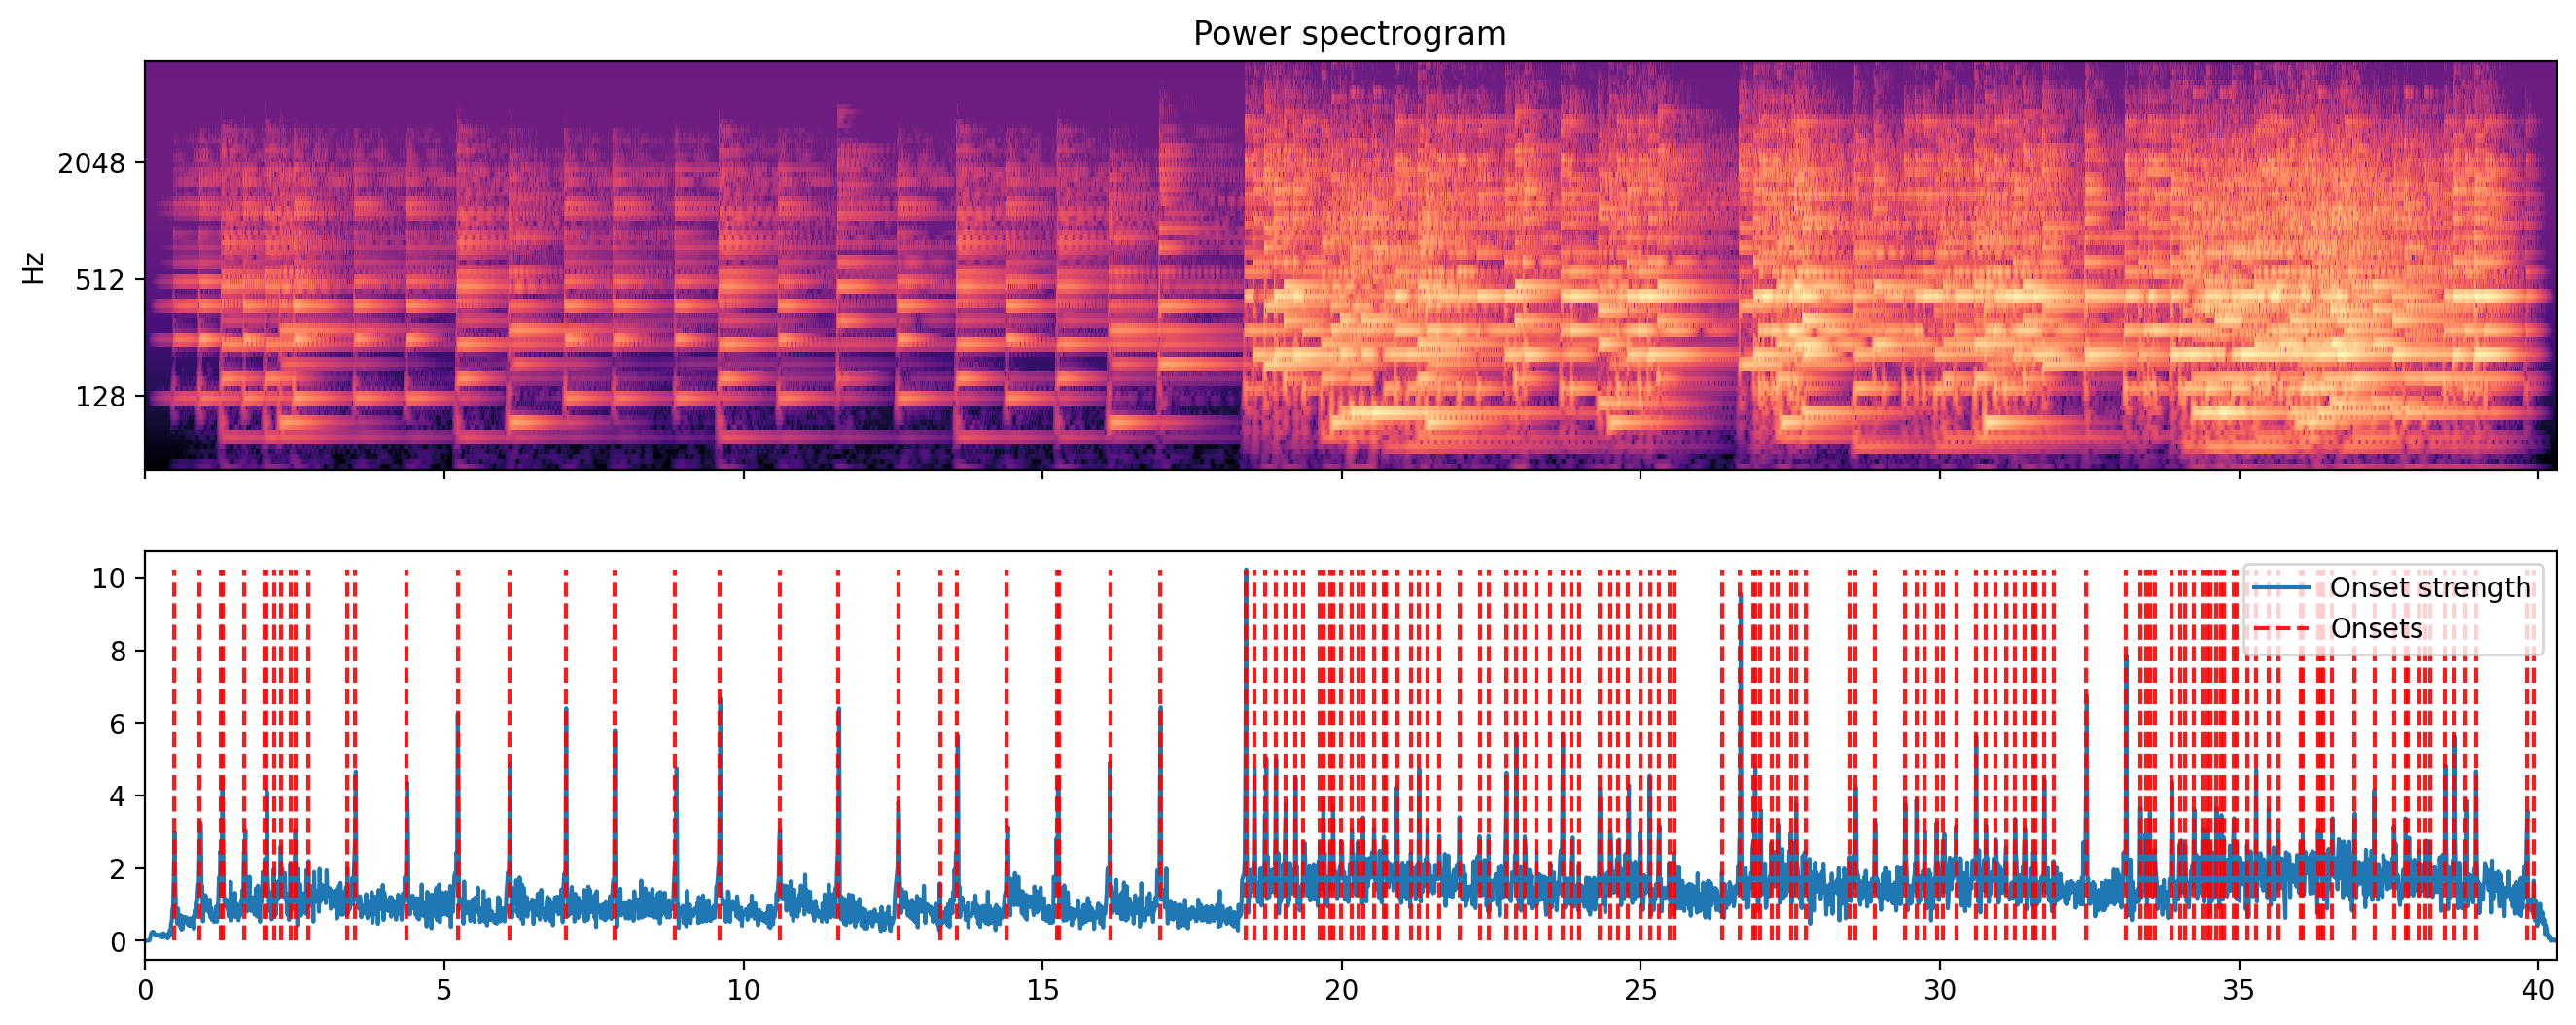

In [100]:
o_env = librosa.onset.onset_strength(
    y=y_harm, sr=sr,
    S=perceptual_CQT,
    hop_length=hop_length
)
times = librosa.times_like(o_env, sr=sr, hop_length=hop_length)
onset_frames = librosa.onset.onset_detect(
    y=y_harm, sr=sr,
    onset_envelope=o_env,
    hop_length=hop_length
)

# Plot
fig = plt.figure(figsize=(16, 6))
ax = fig.subplots(nrows=2, sharex=True)
librosa.display.specshow(    
    perceptual_CQT, sr=sr,
    fmin=librosa.note_to_hz('A1'),
    x_axis='time', y_axis='cqt_hz',
    ax=ax[0]
)
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
ax[1].plot(times, o_env, label='Onset strength')
ax[1].vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9, linestyle='--', label='Onsets')
ax[1].legend()

In [ ]:
clicks = librosa.clicks(frames=onset_frames, sr=sr, hop_length=hop_length, length=len(y_harm))
clicks *= max(y_harm)

Audio(data=y_harm + clicks, rate=sr)

## Onset to Music notes

In [26]:
onset_samples = librosa.frames_to_samples(onset_frames)

In [27]:
n_top = 5
threshold = np.asarray(range(1, n_top + 1)) / np.asarray(range(2, n_top + 2))
data_notes = []
for start, end in zip(onset_samples, np.concatenate([onset_samples[1:], [len(y_harm)]])):
    wav = y_harm[start:end]
    fft = sc.fft.fft(wav)
    fft_freq = sc.fft.fftfreq(len(wav), d=1/sr)
    pos, notes = find_notes(fft, fft_freq, ntop=5)
    magnitude = pos[:, 1]
    pct_magnitude = pos[:, 1] / pos[:, 1].sum()
    actual_notes=np.asarray(notes)[:(pct_magnitude.cumsum() > threshold).argmax() + 1]
    data_notes.append(dict(
        start=start,
        duration=(end - start)/sr,
        wav=wav,
        notes=notes,
        actual_notes=actual_notes,
        magnitude=magnitude,
        pct_magnitude=pct_magnitude,
    ))
data_notes[:3]

[{'start': 20992,
  'duration': 0.4295691609977324,
  'wav': array([ 109.39252815,  110.04490316,  111.27435588, ..., -239.43314066,
         -244.3144061 , -241.71882504]),
  'notes': ['B2', 'B3', 'F#4', 'B4', 'G#6'],
  'actual_notes': array(['B2', 'B3', 'F#4'], dtype='<U3'),
  'magnitude': array([2009168.9991045 ,  961300.75390824,  871887.56162132,
          496502.12956948,  262585.82104541]),
  'pct_magnitude': array([0.43663868, 0.20891279, 0.18948124, 0.10790134, 0.05706594])},
 {'start': 39936,
  'duration': 0.34829931972789113,
  'wav': array([-237.70718746, -228.94153939, -219.68980537, ..., -297.84941651,
         -306.92527066, -315.9597378 ]),
  'notes': ['B3', 'B2', 'B4', 'D#6', 'C#6'],
  'actual_notes': array(['B3'], dtype='<U3'),
  'magnitude': array([4665706.66305912, 1122885.9407281 ,  673562.80206868,
          502542.24433272,  470005.95069575]),
  'pct_magnitude': array([0.62755786, 0.15103305, 0.09059713, 0.06759412, 0.06321785])},
 {'start': 55296,
  'duration': 

### DEBUG: Note

In [28]:
# idx = 0
# raw = data_notes[idx]['wav']
# fft = sc.fft.fft(raw)
# fft_freq = sc.fft.fftfreq(len(raw), d=1/sr)
# _, found_notes = find_notes(fft, fft_freq, ntop=6, with_plot=True)

# print('LEN:', len(data_notes[idx]['wav']))
# display(Audio(data=raw, rate=music['rate']))
# Chord(found_notes).show('midi')

## Sample Notes

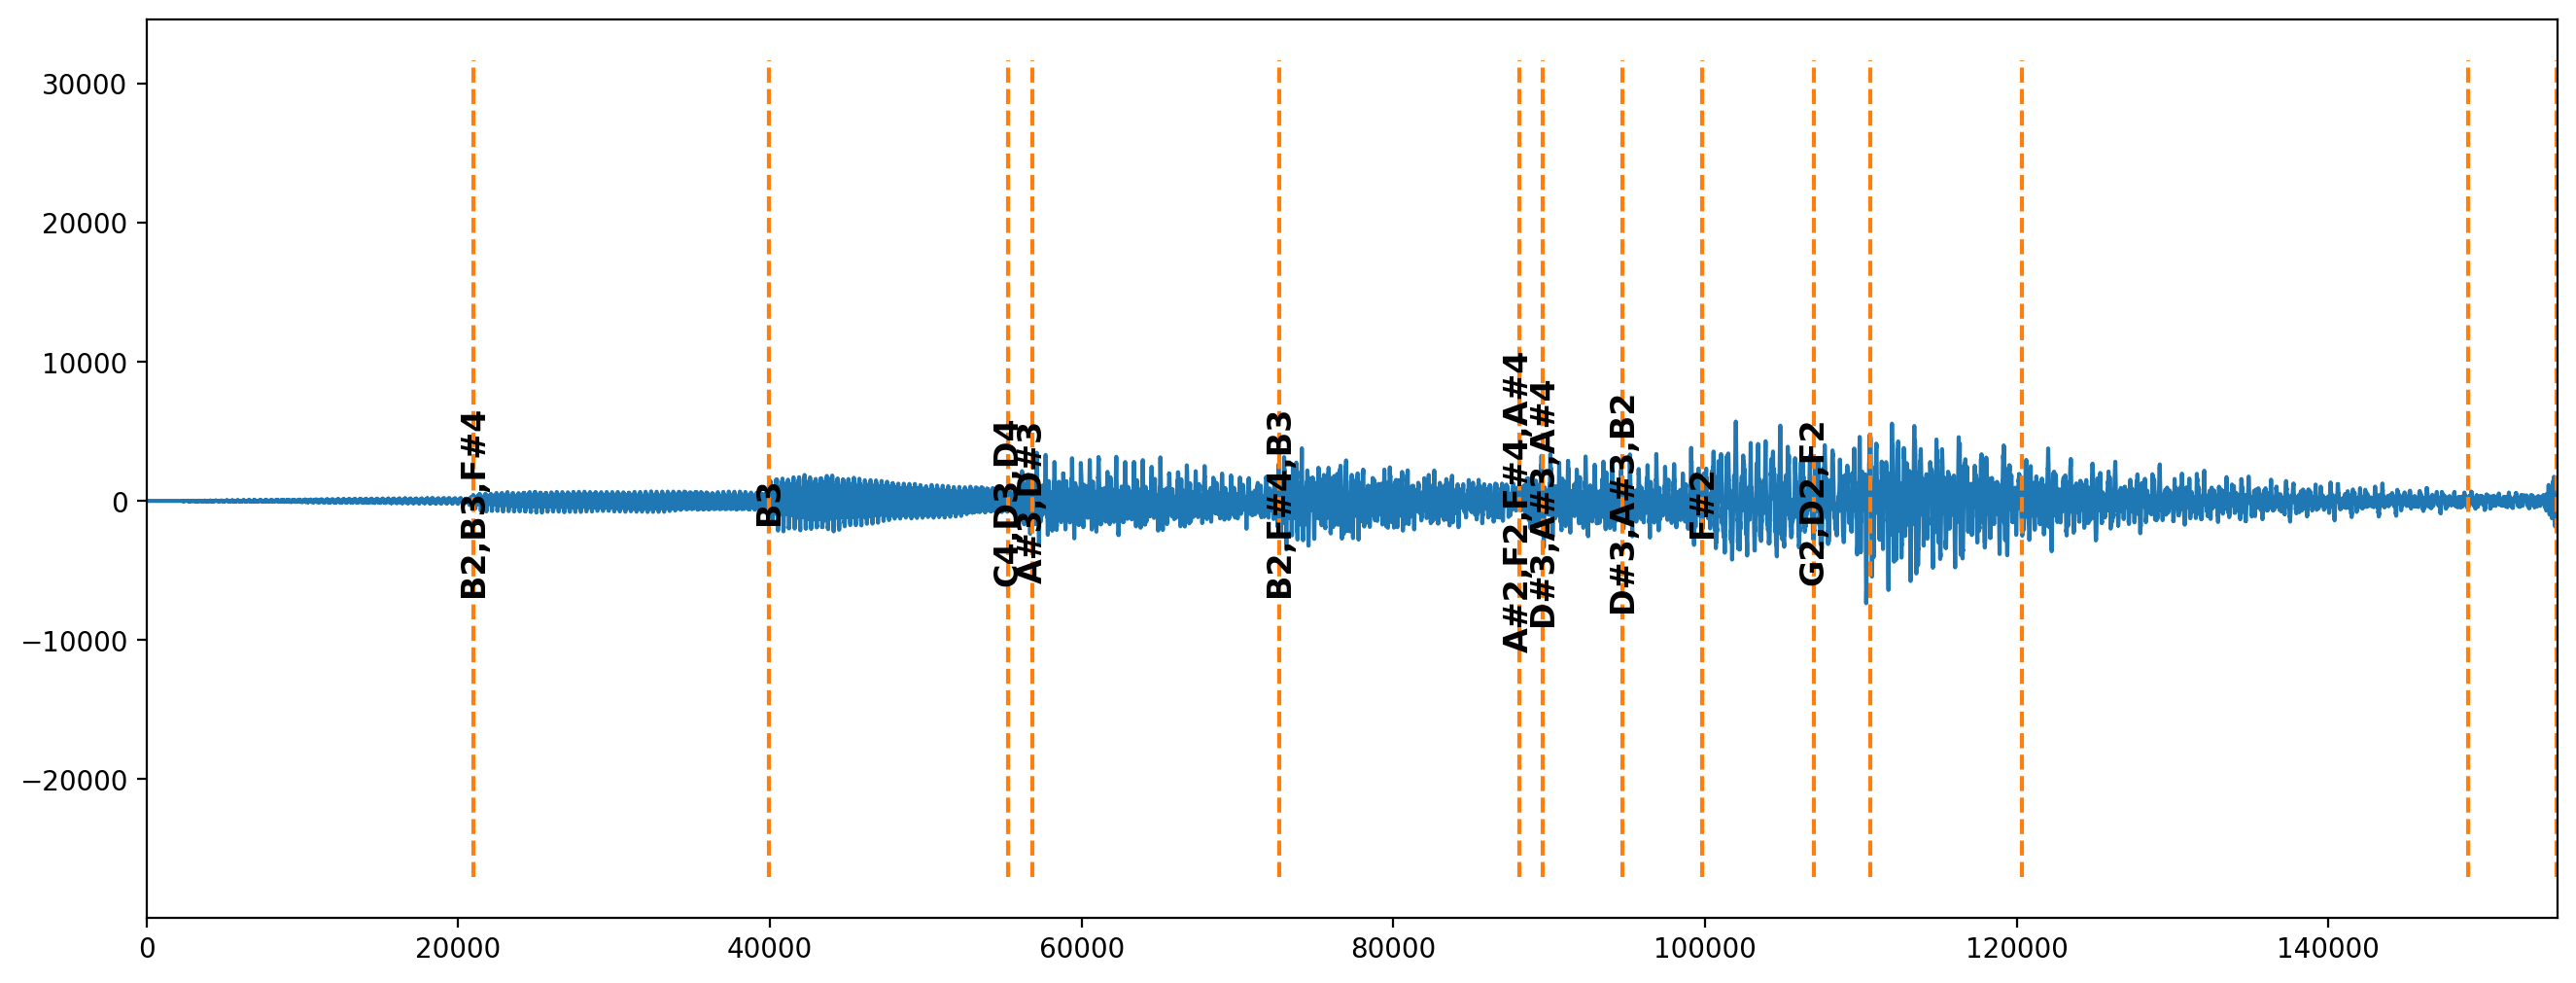

In [29]:
N_NOTES = min(len(data_notes), 10)

notes_x = list(map(lambda x: x['start'], data_notes))
notes_text = list(map(lambda x: ','.join(x['actual_notes']), data_notes))

# Plot
fig = plt.figure(figsize=(16, 6))
ax = fig.subplots(1)
ax.plot(example)
ax.vlines(onset_samples, ymin=example.min(), ymax=example.max(), linestyles='--', color='tab:orange')

for i, (x, t) in enumerate(list(zip(notes_x, notes_text))[:N_NOTES]):
    ax.text(
        x, 0, t,
        rotation='vertical', fontweight='bold', fontsize='large',
        horizontalalignment='center', verticalalignment='center'
    )

start, end = max(0, onset_samples[0] - sr), min(len(example), onset_samples[N_NOTES] + sr)
ax.set_xlim(start, end)
clicks = librosa.clicks(frames=onset_frames[:N_NOTES], sr=sr, length=len(y_harm))[start:end]
Audio(data=y_harm[start: end] + clicks * example[start:end].max(), rate=sr)

# Generate Music

## Computed Waveform

In [ ]:
generated_wav = []
for notes in data_notes:
    T = notes['duration']
    t = np.linspace(0, T, int(T * sr), endpoint=False)
    freqs = [librosa.note_to_hz(n) for n in notes['notes']]
    
    generated_wav.append(sum([np.sin(2 * np.pi * f * t) * mag for f, mag in zip(freqs, notes['magnitude'])]))

print('Generated:')
display(Audio(data=np.concatenate(generated_wav), rate=sr))
print('Original:')
display(Audio(data=y_harm[onset_samples[0]:], rate=sr))

## By Notes

In [31]:
from music21.stream import Stream
from music21.duration import Duration

In [32]:
s = Stream()
for note in data_notes:
    actual_notes = note['actual_notes']
    duration = note['duration']
    if len(actual_notes) == 1:  # Note
        n = Note(actual_notes[0])
        d = Duration()
        d.quarterLength = duration
        n.duration = d
        s.append(n)
    else:  # Chord
        c = Chord(actual_notes)
        d = Duration()
        d.quarterLength = duration
        c.duration = d
        s.append(c)
s.show('text')

{0.0} <music21.chord.Chord B2 B3 F#4>
{0.4296} <music21.note.Note B>
{0.7779} <music21.chord.Chord C4 D3 D4>
{0.8127} <music21.chord.Chord A#3 D#3>
{1.1726} <music21.chord.Chord B2 F#4 B3>
{1.5209} <music21.chord.Chord A#2 F2 F#4 A#4>
{1.5557} <music21.chord.Chord D#3 A#3 A#4>
{1.6718} <music21.chord.Chord D#3 A#3 B2>
{1.7879} <music21.note.Note F#>
{1.9505} <music21.chord.Chord G2 D2 F2>
{2.0317} <music21.chord.Chord B2 F#4 B3>
{2.2523} <music21.chord.Chord F#2 B2 F#4 C#4>
{2.9025} <music21.chord.Chord B2 C#4 A#3 F#2>
{3.0302} <music21.chord.Chord B2 B3>
{3.8893} <music21.chord.Chord B2 F#4>
{4.7485} <music21.chord.Chord A#3 A#4 D#3>
{5.6076} <music21.note.Note F#>
{6.5596} <music21.chord.Chord B2 B3 F#4>
{7.3723} <music21.chord.Chord B2 B3 F#4>
{8.3824} <music21.note.Note B>
{9.1254} <music21.chord.Chord A#3 D#3 A#4>
{10.1239} <music21.chord.Chord B2 F#4 B3>
{11.0991} <music21.chord.Chord A#4 D#4 C#6 D#5>
{12.1092} <music21.chord.Chord B3 F#4 B2>
{12.8058} <music21.chord.Chord B2 A#2

In [ ]:
print('Generated:')
s.augmentOrDiminish(2).show('midi')
print('Original:')
display(Audio(data=y_harm[onset_samples[0]:], rate=sr))

# EEG Analysis

In [35]:
SUB_ID = 1
GEN_ID = '01'
ROOT_PATH = 'preprocessing/data'

In [67]:
data = mne.io.read_raw_fif(os.path.join(ROOT_PATH, f'ica_sub-{SUB_ID:02d}_task-genMusic{GEN_ID}_eeg.fif'))

Opening raw data file preprocessing/data\ica_sub-01_task-genMusic01_eeg.fif...
    Range : 0 ... 379903 =      0.000 ...   741.998 secs
Ready.


In [68]:
events = mne.find_events(data, stim_channel='music')

11 events found
Event IDs: [281 282 283 452 821 822 823]


## Before/After Start

Not setting metadata
11 matching events found
No baseline correction applied
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


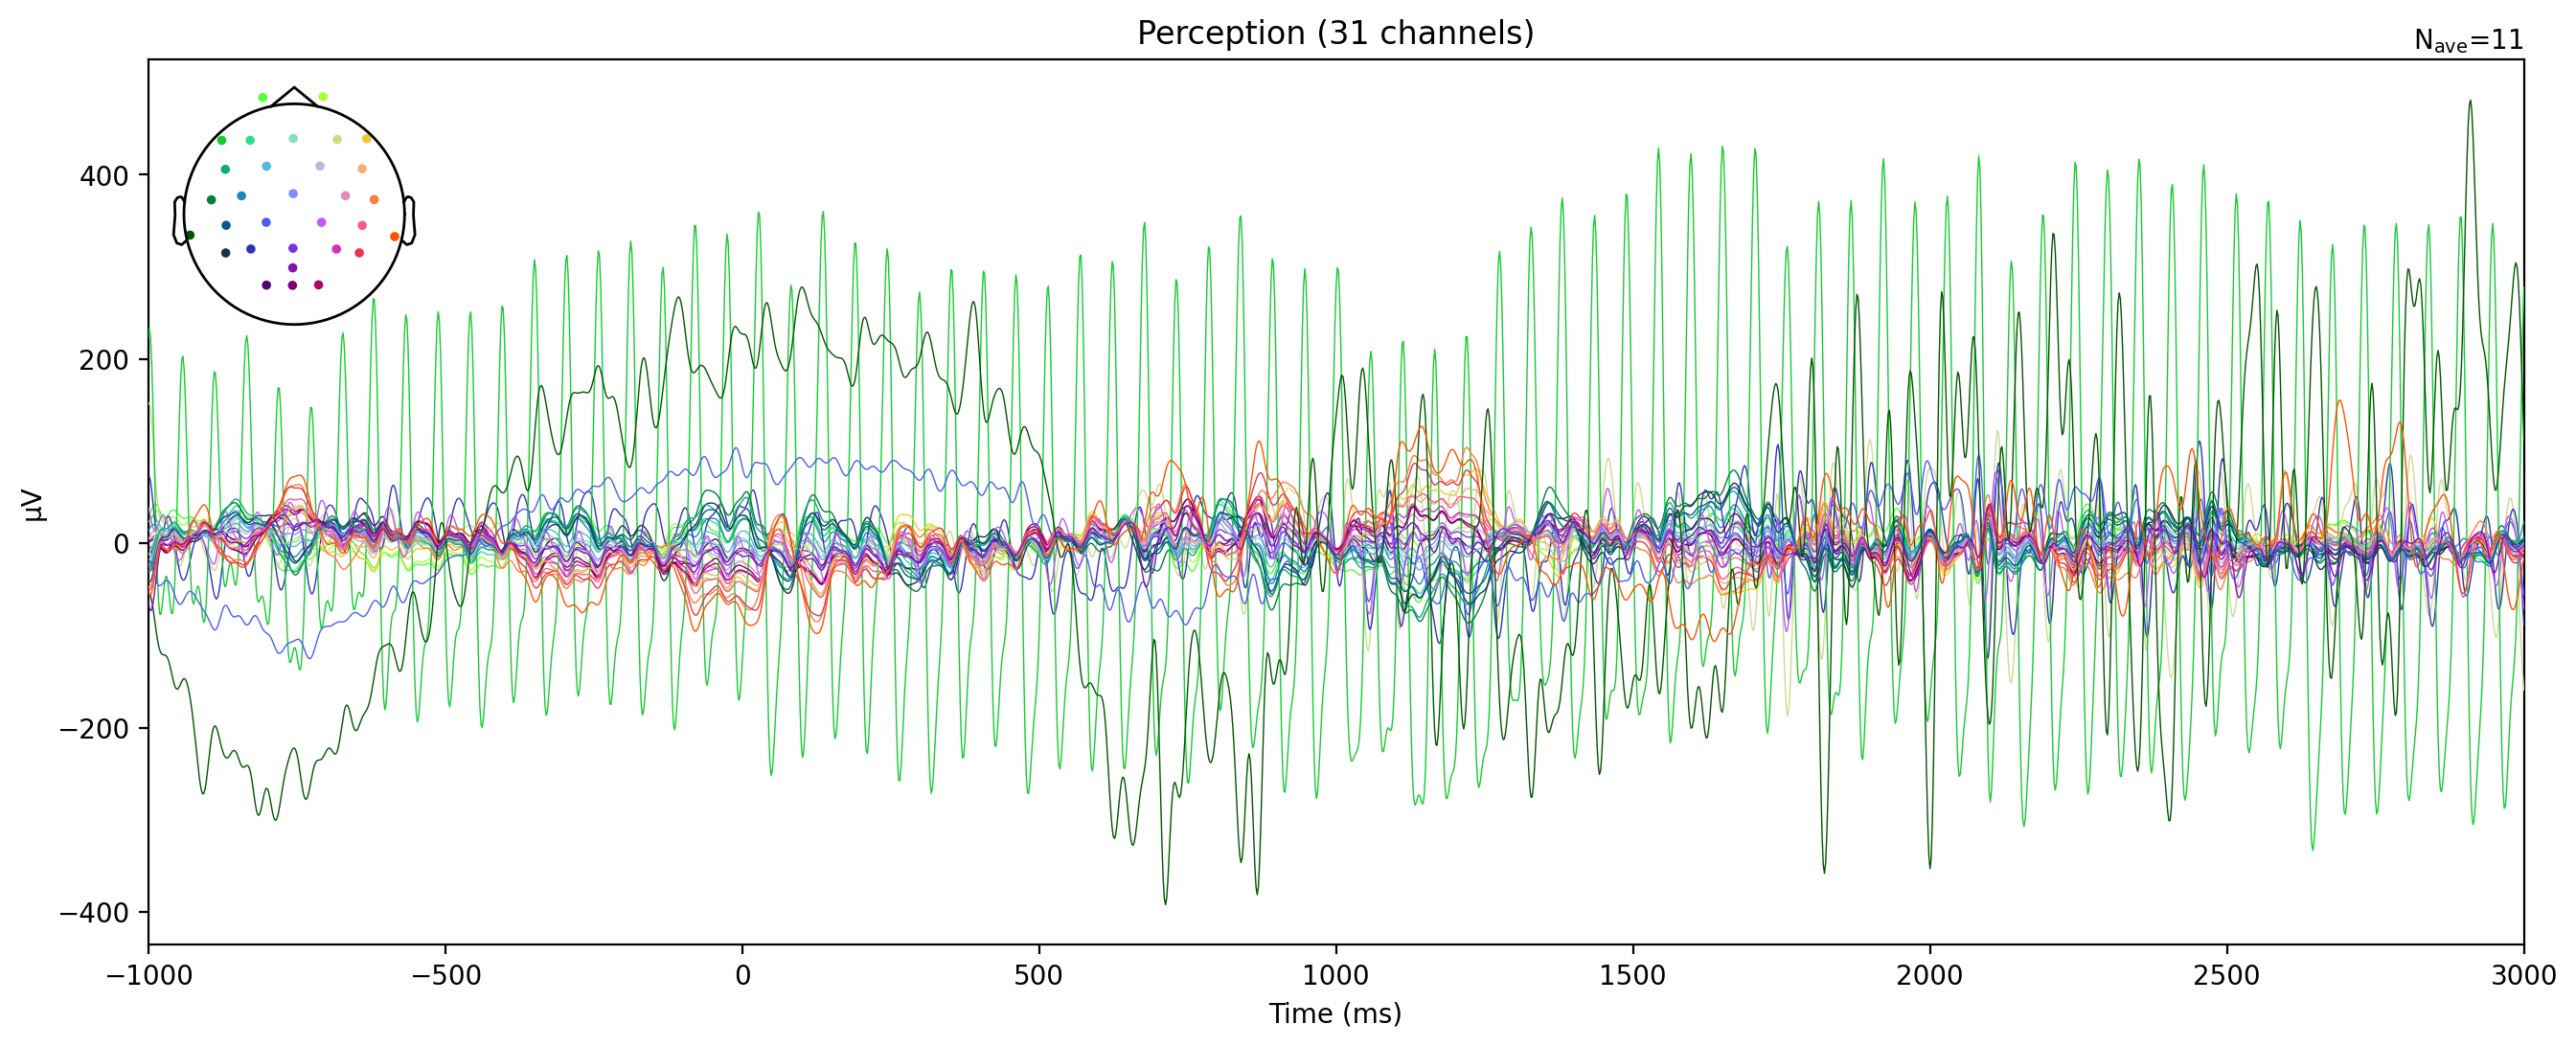

In [109]:
tmin_ = -1.0
tmax_ = 3.0
ex_ba_perc = mne.Epochs(data, events, tmin=tmin_, tmax=tmax_, baseline=None, picks='eeg')

%matplotlib inline

fig1 = plt.figure(figsize=(16, 6))
ax1 = fig1.subplots()
ex_ba_perc.average(picks='data').plot(titles='Perception', time_unit="ms", axes=ax1);

## Beats

In [79]:
beat_idx = np.round(onset_samples/music['rate']*data.info['sfreq']).astype(int)
beat_idx

array([  244,   464,   642,   660,   844,  1022,  1040,  1100,  1159,
        1242,  1284,  1397,  1730,  1795,  2235,  2675,  3115,  3602,
        4018,  4536,  4916,  5427,  5926,  6444,  6800,  6949,  7371,
        7799,  7817,  8257,  8685,  9416,  9493,  9582,  9671,  9755,
        9844,  9909, 10052, 10082, 10141, 10165, 10236, 10325, 10379,
       10420, 10515, 10599, 10617, 10712, 10831, 10902, 10973, 11074,
       11247, 11419, 11496, 11645, 11734, 11805, 11906, 12025, 12126,
       12204, 12269, 12447, 12537, 12608, 12691, 12792, 12875, 12953,
       13042, 13083, 13494, 13648, 13761, 13779, 13821, 13916, 13969,
       14082, 14124, 14207, 14581, 14635, 14801, 15063, 15158, 15229,
       15330, 15384, 15497, 15669, 15752, 15836, 15925, 16002, 16079,
       16157, 16174, 16252, 16329, 16608, 16947, 17072, 17120, 17155,
       17197, 17340, 17411, 17458, 17530, 17607, 17649, 17672, 17726,
       17768, 17785, 17869, 17898, 17987, 18065, 18172, 18255, 18445,
       18463, 18594,

In [86]:
start_idx = events[0, 0]
beat_events = np.asarray([[idx, 0, 1] for idx in (beat_idx + start_idx)])

Not setting metadata
145 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


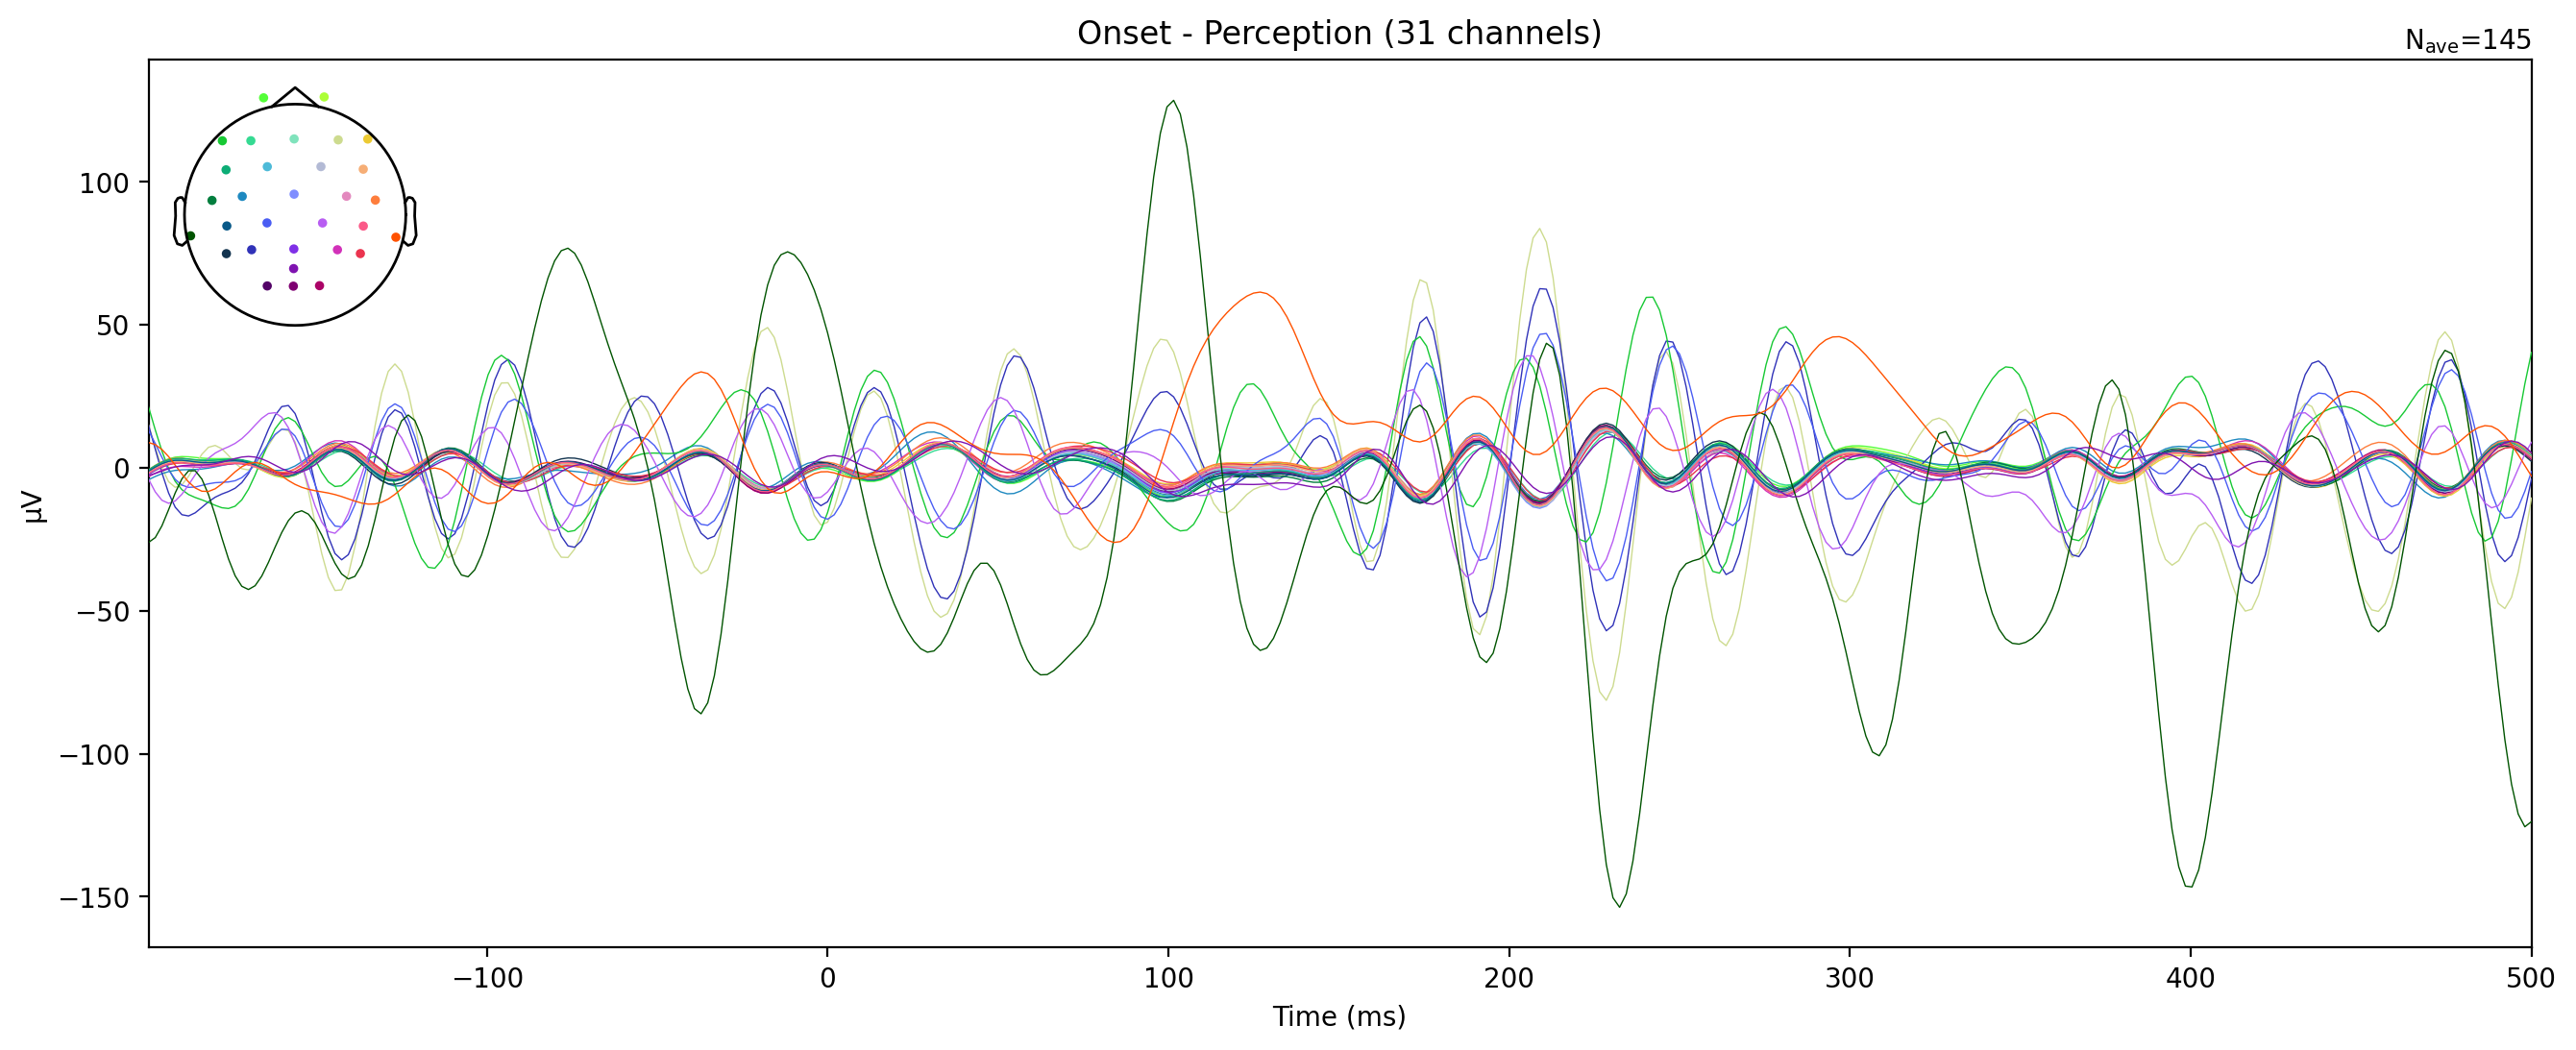

In [115]:
analysis_beats = mne.Epochs(data, beat_events, tmin=-0.2, tmax=0.5)

fig1 = plt.figure(figsize=(16, 6))
ax1 = fig1.subplots()
analysis_beats.average(picks='data').plot(titles='Onset - Perception', time_unit='ms', axes=ax1);

Not setting metadata
31 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


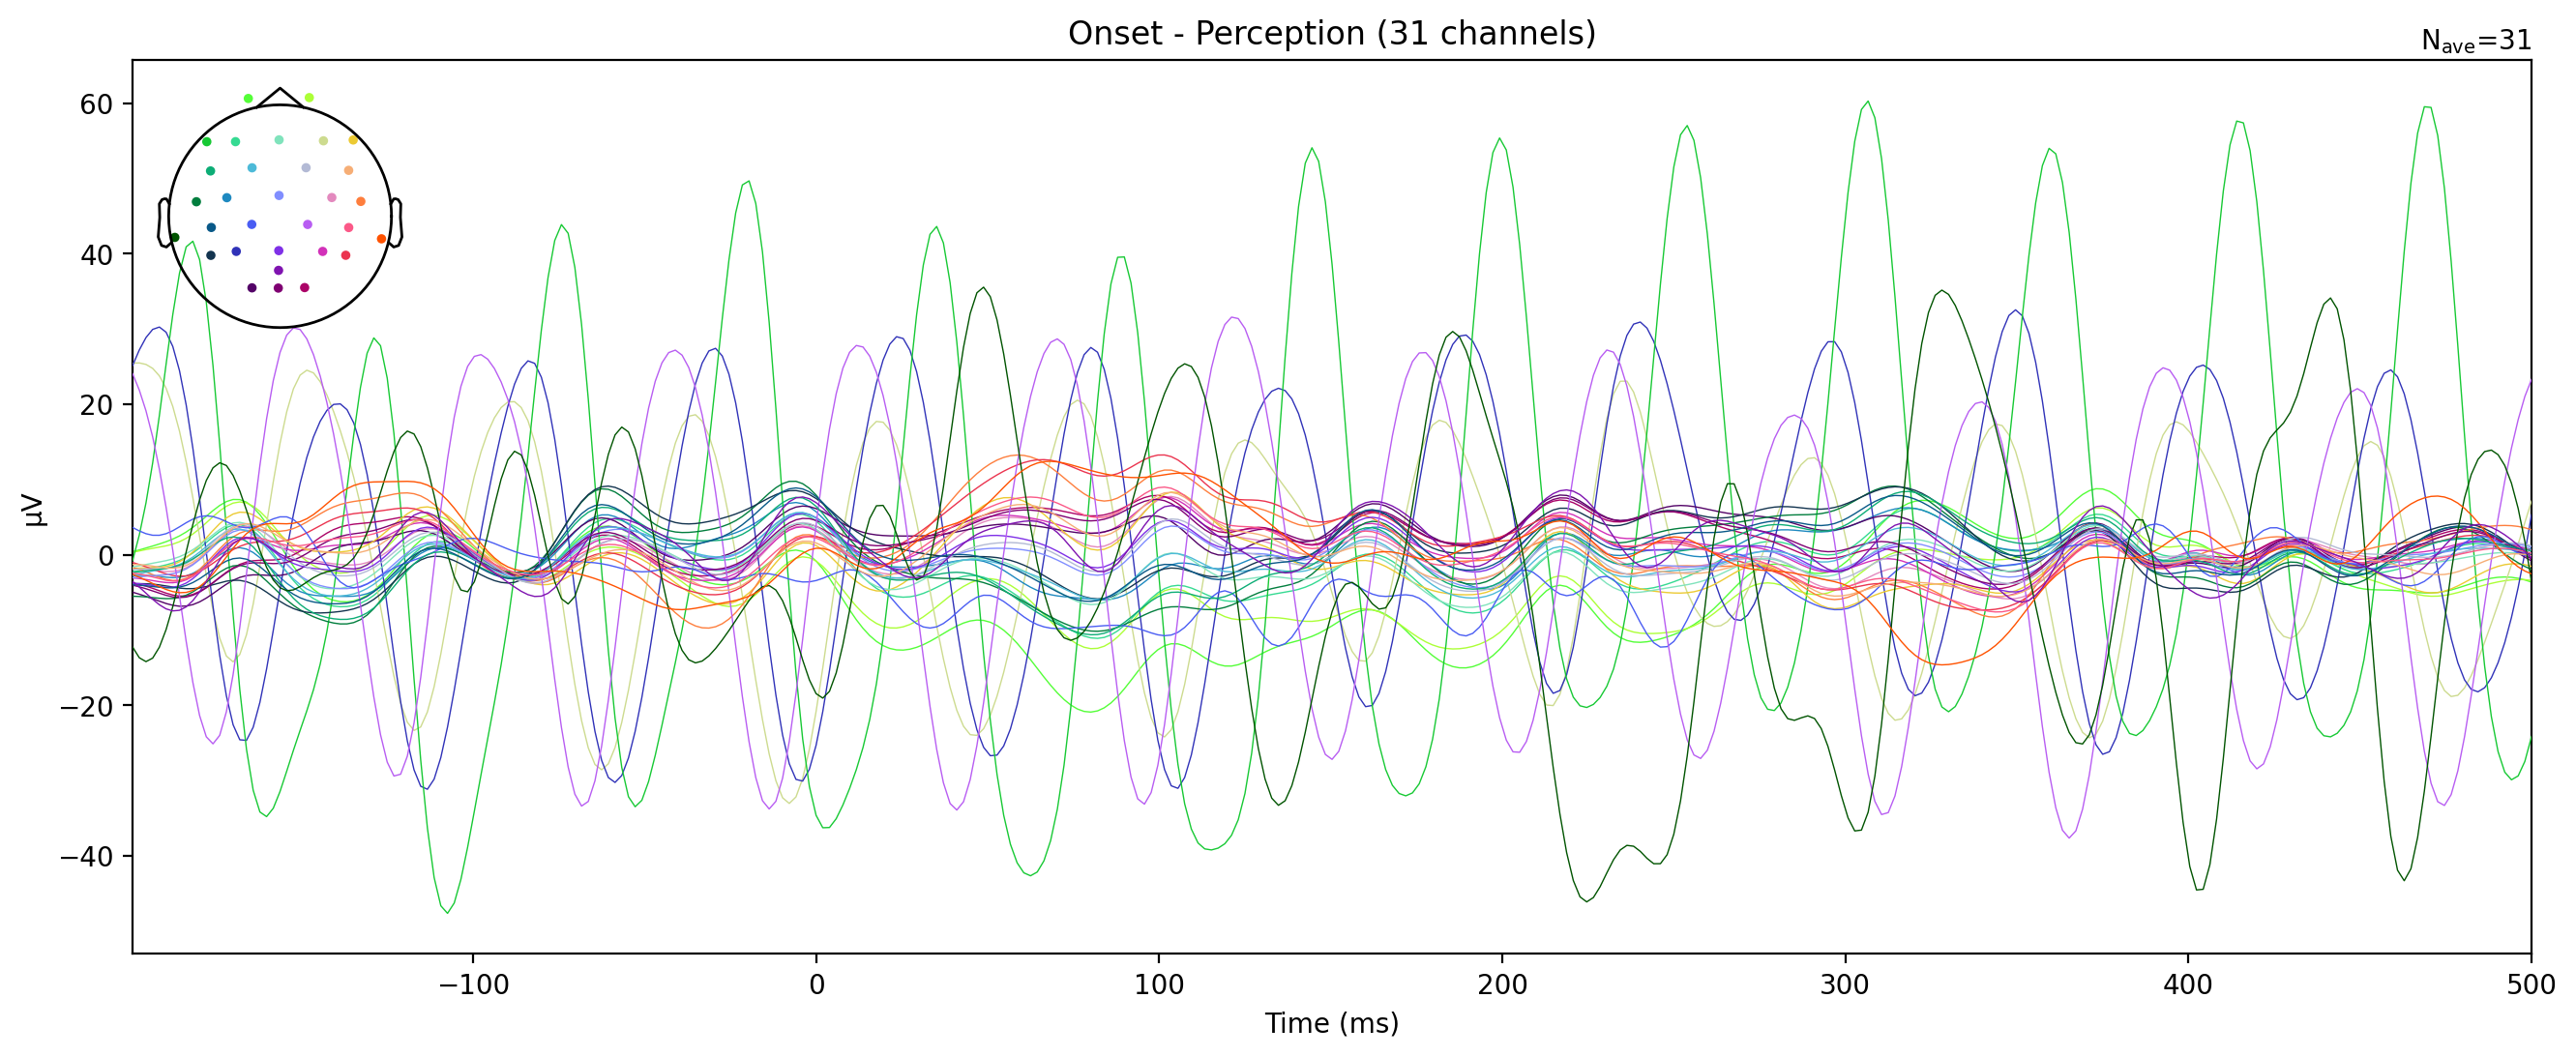

In [106]:
analysis_beats_1st_half = mne.Epochs(data, beat_events[:31], tmin=-0.2, tmax=0.5)

fig1 = plt.figure(figsize=(16, 6))
ax1 = fig1.subplots()
analysis_beats_1st_half.average(picks='data').plot(titles='Onset - Perception', time_unit='ms', axes=ax1);

Not setting metadata
114 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


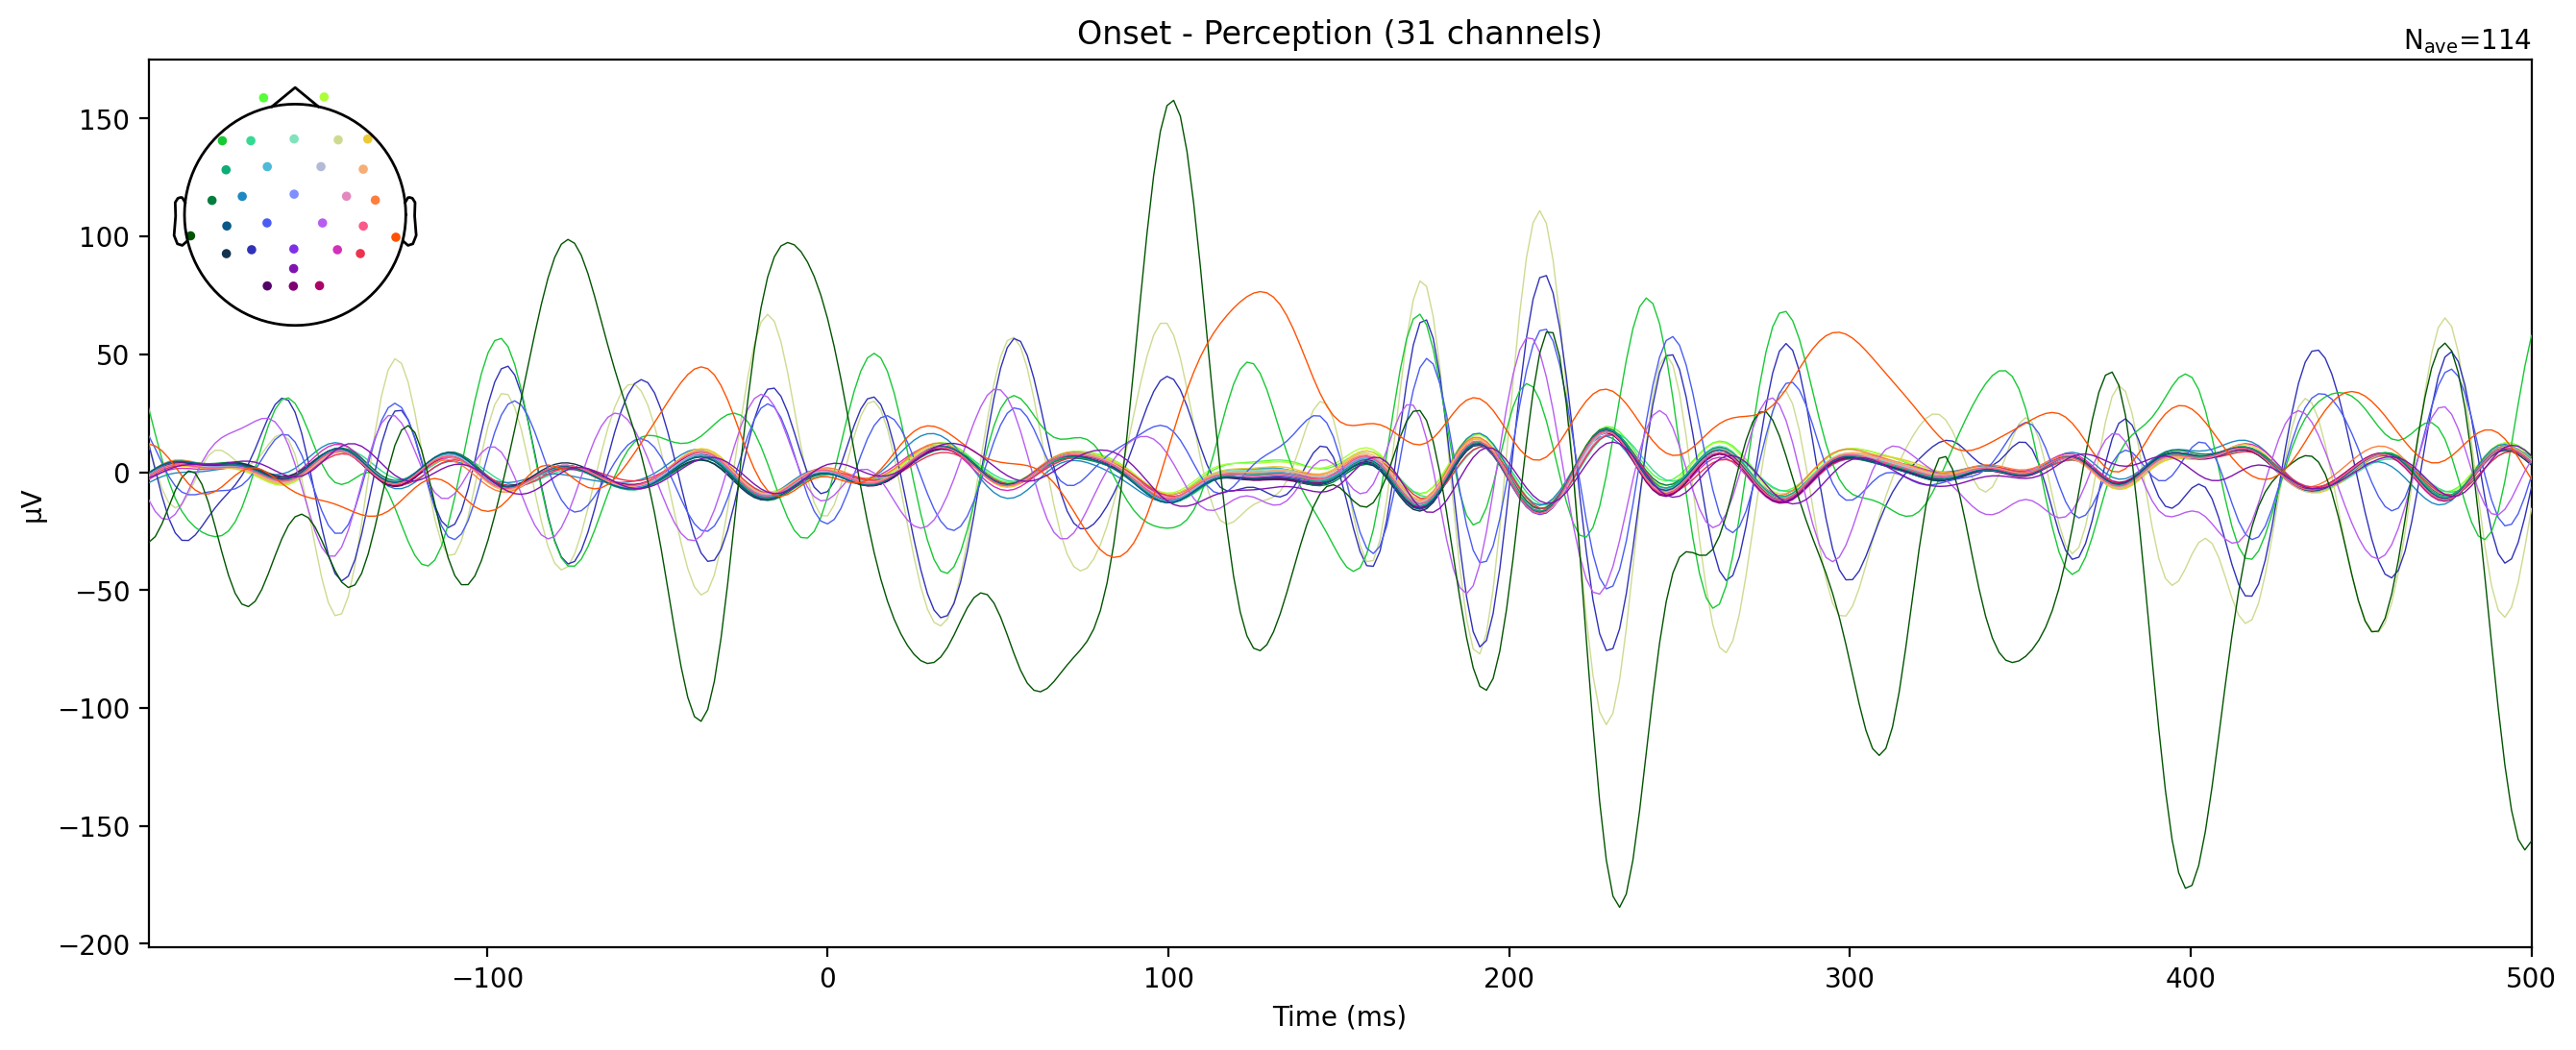

In [107]:
analysis_beats_2nd_half = mne.Epochs(data, beat_events[31:], tmin=-0.2, tmax=0.5)

fig1 = plt.figure(figsize=(16, 6))
ax1 = fig1.subplots()
analysis_beats_2nd_half.average(picks='data').plot(titles='Onset - Perception', time_unit='ms', axes=ax1);